In [28]:
#Importação de bibliotecas
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm
from pmdarima import model_selection
from sklearn.metrics import mean_squared_error
from arch import arch_model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score
from sklearn.metrics.pairwise import cosine_similarity
import statsmodels.api as sm

Arquivo salvo: Weather_Data_1980_2024(daily).csv


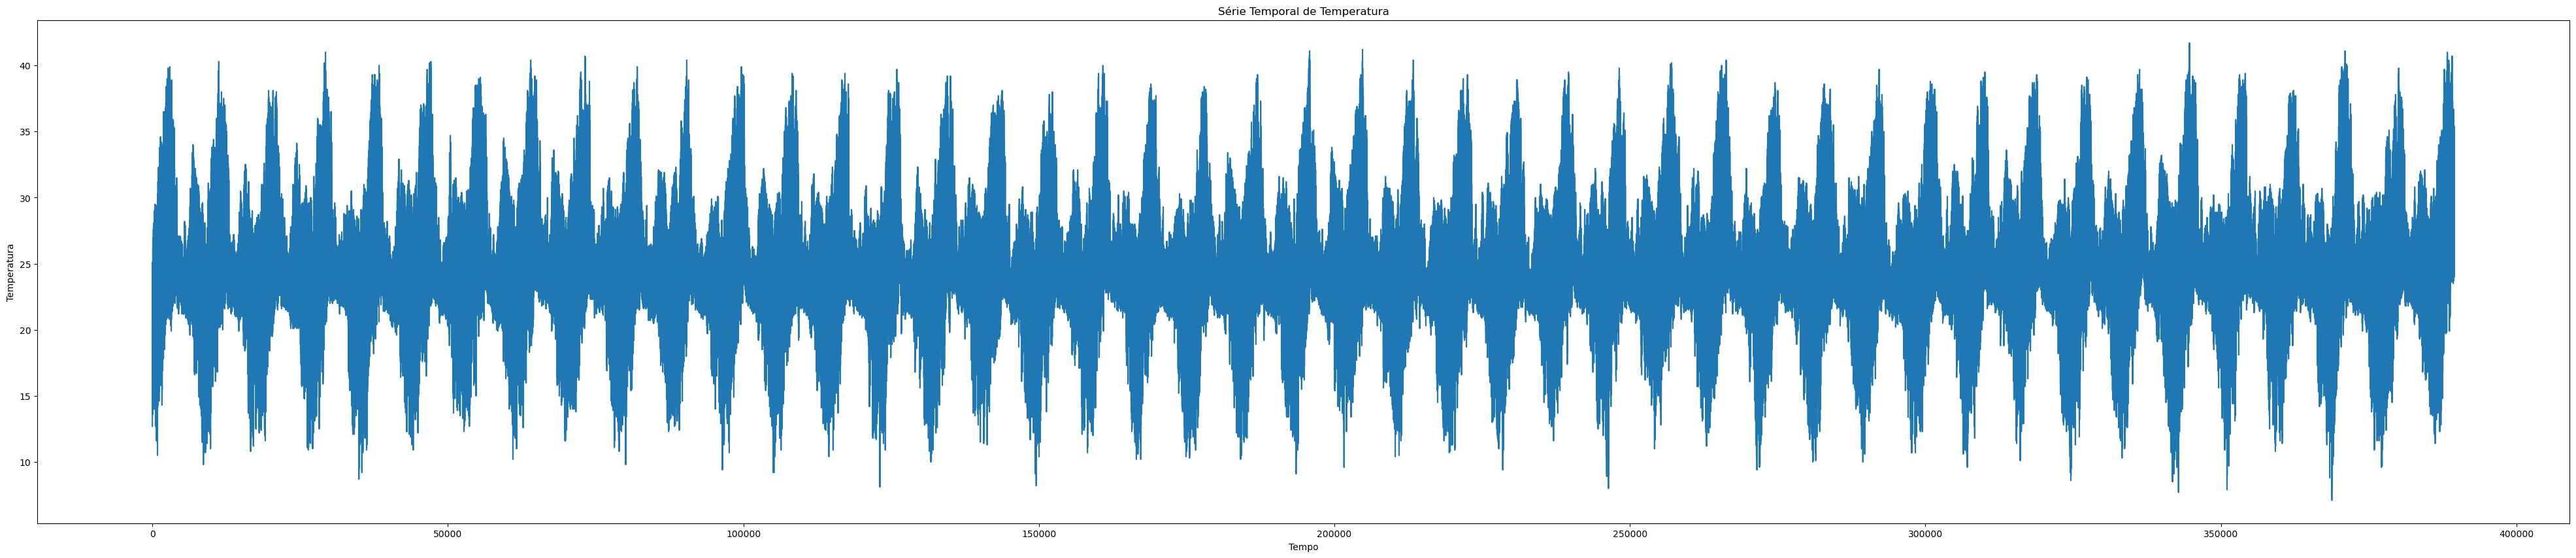

In [29]:
# Carregar os dados
# Carregar os dados
file_path = "Weather_Data_1980_2024(hourly).csv"  # Substitua pelo caminho correto do seu arquivo
df = pd.read_csv(file_path)

# Converter a coluna 'time' para datetime
df["time"] = pd.to_datetime(df["time"])

# Criar uma nova coluna apenas com a data (removendo a hora)
df["date"] = df["time"].dt.date

# Definir regras de agregação
agg_rules = {
    "temperature": "mean",
    "relative_humidity": "mean",
    "dew_point": "mean",
    "precipitation (mm)": "sum",
    "rain (mm)": "sum",
    "snowfall (cm)": "sum",
    "pressure_msl (hPa)": "mean",
    "surface_pressure (hPa)": "mean",
    "cloud_cover (%)": "mean",
    "cloud_cover_low (%)": "mean",
    "cloud_cover_mid (%)": "mean",
    "cloud_cover_high (%)": "mean",
    "vapour_pressure_deficit (kPa)": "mean",
    "wind_speed_10m (km/h)": "mean",
    "wind_direction": lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0],  # Moda ou primeiro valor se vazio
}

# Aplicar agregação para obter dados diários
df_daily = df.groupby("date").agg(agg_rules).reset_index()

# Salvar os dados diários em um novo arquivo CSV
output_file_path = "Weather_Data_1980_2024(daily).csv"
df_daily.to_csv(output_file_path, index=False)

print(f"Arquivo salvo: {output_file_path}")

# Plotando a série temporal de temperatura
plt.figure(figsize=(50, 10))
plt.plot(df['temperature'])
plt.title('Série Temporal de Temperatura')
plt.xlabel('Tempo')
plt.ylabel('Temperatura')
plt.show()

In [30]:
# Carregar os dados diários
file_path = "Weather_Data_1980_2024(daily).csv"  # Caminho para o arquivo diário gerado
df_daily = pd.read_csv(file_path)

# Converter a coluna 'date' para datetime
df_daily["date"] = pd.to_datetime(df_daily["date"])

# Criar uma nova coluna para indicar a semana (ano e número da semana)
df_daily["week"] = df_daily["date"].dt.to_period("W")

# Definir regras de agregação para dados semanais
agg_rules_weekly = {
    "temperature": "mean",
    "relative_humidity": "mean",
    "dew_point": "mean",
    "precipitation (mm)": "sum",
    "rain (mm)": "sum",
    "snowfall (cm)": "sum",
    "pressure_msl (hPa)": "mean",
    "surface_pressure (hPa)": "mean",
    "cloud_cover (%)": "mean",
    "cloud_cover_low (%)": "mean",
    "cloud_cover_mid (%)": "mean",
    "cloud_cover_high (%)": "mean",
    "vapour_pressure_deficit (kPa)": "mean",
    "wind_speed_10m (km/h)": "mean",
    "wind_direction": lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0],  # Moda ou primeiro valor se vazio
}

# Aplicar agregação para obter dados semanais
df_weekly = df_daily.groupby("week").agg(agg_rules_weekly).reset_index()

# Salvar os dados semanais em um novo arquivo CSV
output_file_path_weekly = "Weather_Data_1980_2024(weekly).csv"
df_weekly.to_csv(output_file_path_weekly, index=False)

print(f"Arquivo semanal salvo: {output_file_path_weekly}")

Arquivo semanal salvo: Weather_Data_1980_2024(weekly).csv


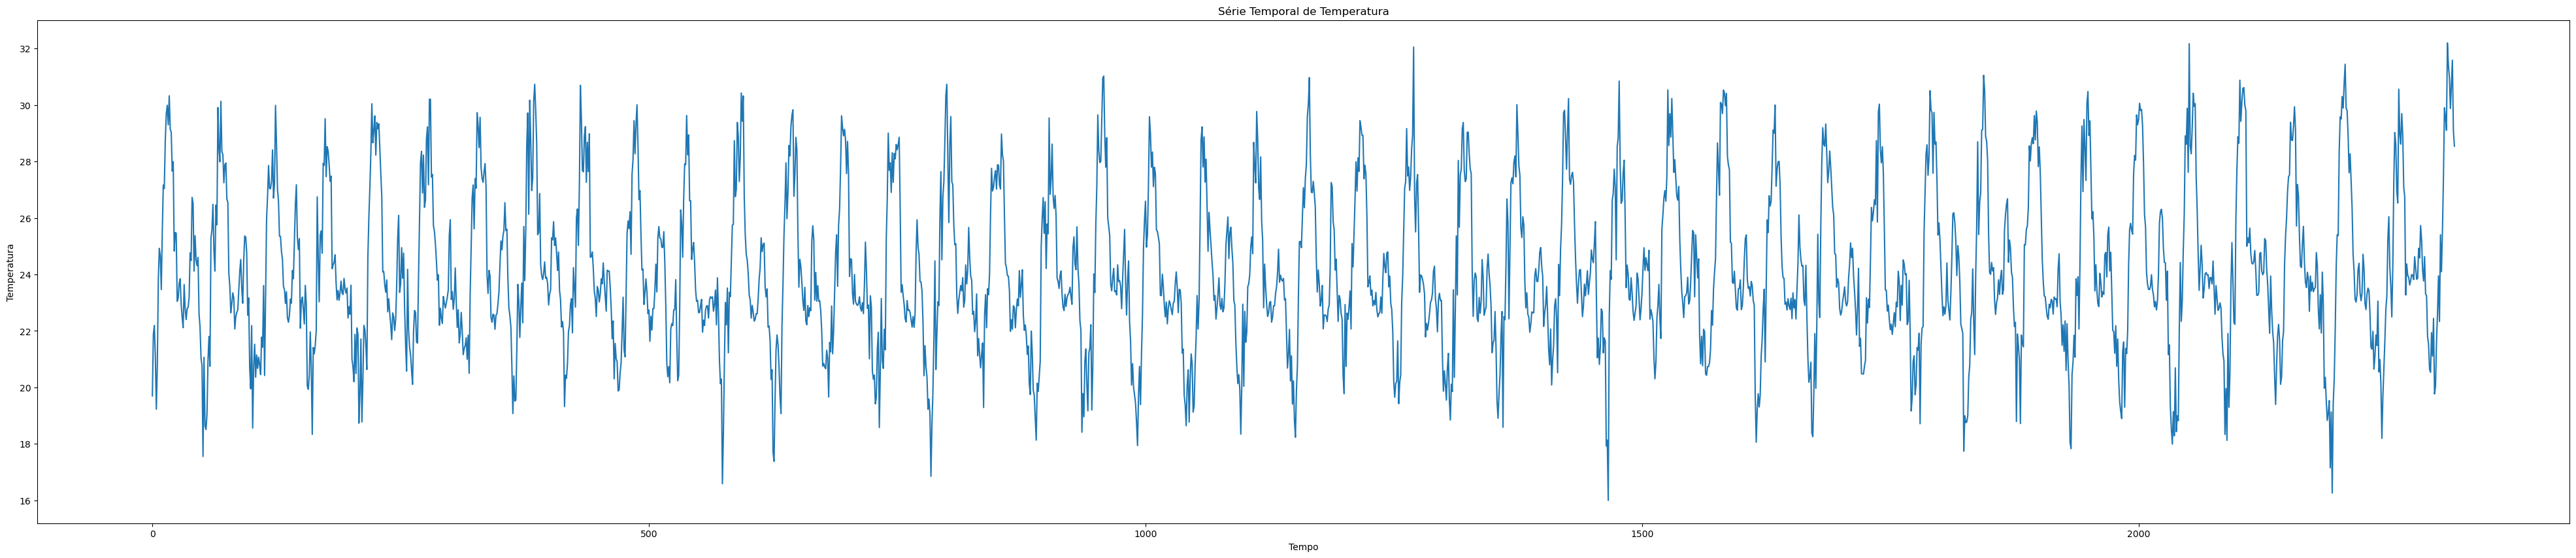

In [31]:
#Leitura dos novos dados
df = pd.read_csv('Weather_Data_1980_2024(weekly).csv')
# Plotando a série temporal de temperatura
plt.figure(figsize=(50, 10))
plt.plot(df['temperature'])
plt.title('Série Temporal de Temperatura')
plt.xlabel('Tempo')
plt.ylabel('Temperatura')
plt.show()

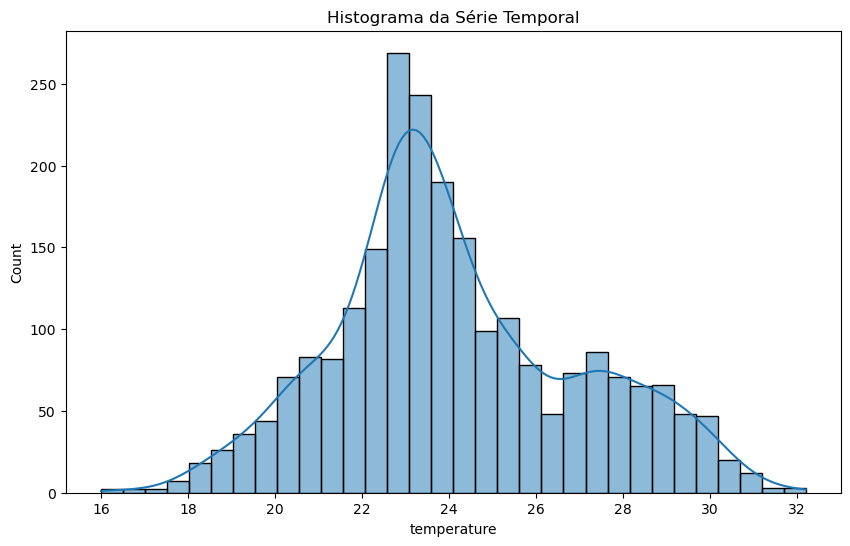

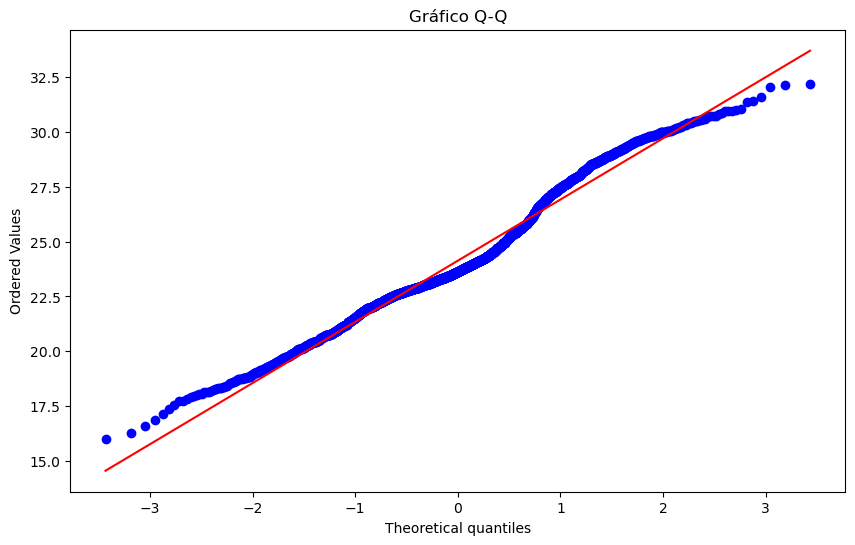

Shapiro-Wilk Teste
Estatística: 0.9780781894845435
Valor-p: 0.00

Teste de Kolmogorov-Smirnov
Estatística: 1.0
Valor-p: 0.0

Teste de Anderson-Darling
Estatística: 22.19925187237004
Valores Críticos: [0.575 0.655 0.786 0.916 1.09 ]
Resultado: [15.  10.   5.   2.5  1. ]


In [51]:
# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['temperature'], kde=True)
plt.title('Histograma da Série Temporal')
plt.show()

# Gráfico Q-Q
plt.figure(figsize=(10, 6))
stats.probplot(df['temperature'], dist="norm", plot=plt)
plt.title('Gráfico Q-Q')
plt.show()

# Teste de Shapiro-Wilk
shapiro_test = stats.shapiro(df['temperature'])
print('Shapiro-Wilk Teste')
print('Estatística:', shapiro_test.statistic)
print(f'Valor-p: {shapiro_test.pvalue:.2f}')

# Teste de Kolmogorov-Smirnov
ks_test = stats.kstest(df['temperature'], 'norm')
print('\nTeste de Kolmogorov-Smirnov')
print('Estatística:', ks_test.statistic)
print('Valor-p:', ks_test.pvalue)

# Teste de Anderson-Darling
ad_test = stats.anderson(df['temperature'], dist='norm')
print('\nTeste de Anderson-Darling')
print('Estatística:', ad_test.statistic)
print('Valores Críticos:', ad_test.critical_values)
print('Resultado:', ad_test.significance_level)

In [33]:
data = df['temperature']
# Executar o teste ADF na série original
result = adfuller(data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -17.260683817689358
p-value: 5.944011788048254e-30


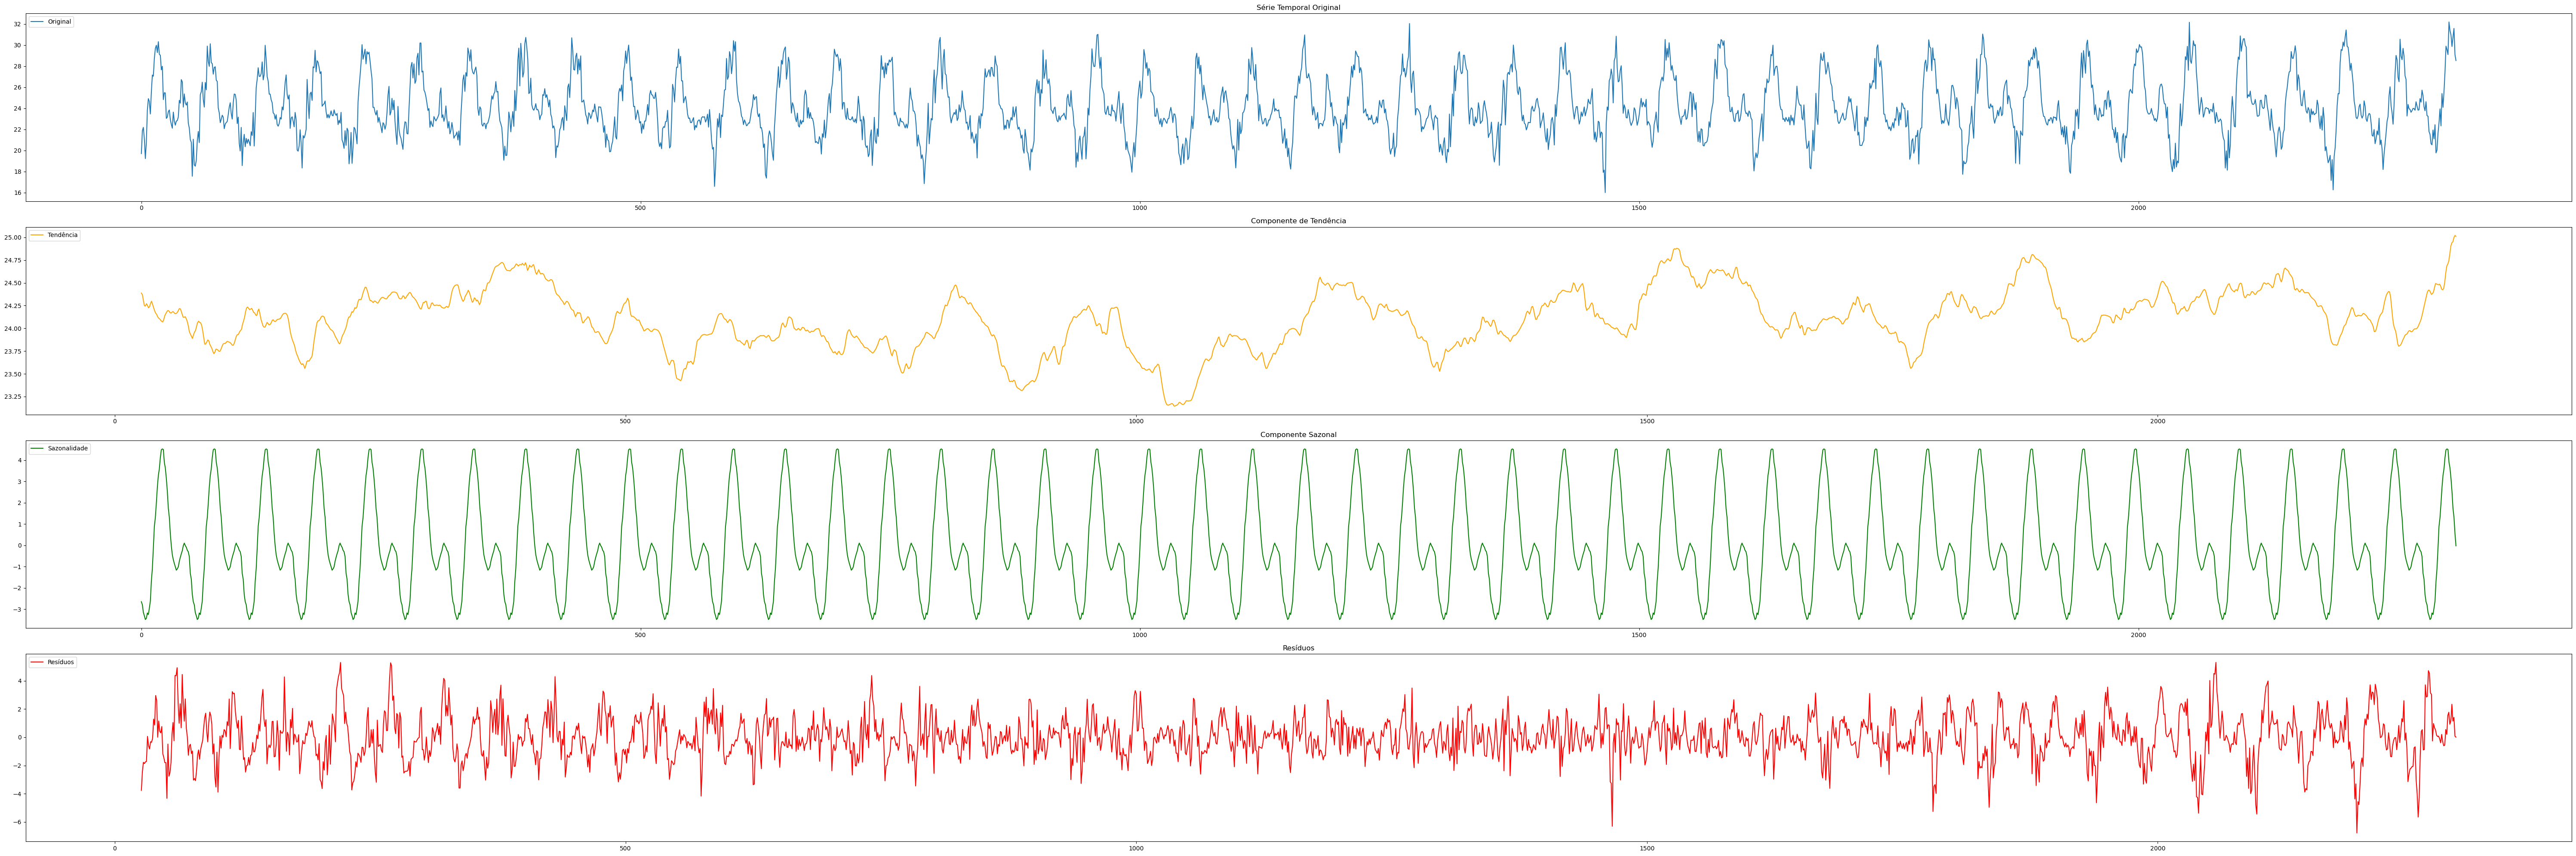

In [34]:
# Decompondo a série temporal
decomposicao = seasonal_decompose(df['temperature'], model='additive', period=52)  # 'period=12' para sazonalidade anual # Talvez mudar sazonalidade?

# Plotando os componentes
plt.figure(figsize=(60, 20))

plt.subplot(411)
plt.plot(df['temperature'], label='Original')
plt.legend(loc='upper left')
plt.title('Série Temporal Original')

plt.subplot(412)
plt.plot(decomposicao.trend, label='Tendência', color='orange')
plt.legend(loc='upper left')
plt.title('Componente de Tendência')

plt.subplot(413)
plt.plot(decomposicao.seasonal, label='Sazonalidade', color='green')
plt.legend(loc='upper left')
plt.title('Componente Sazonal')

plt.subplot(414)
plt.plot(decomposicao.resid, label='Resíduos', color='red')
plt.legend(loc='upper left')
plt.title('Resíduos')

plt.tight_layout()
plt.show()

In [35]:
# plt.figure(figsize=(12, 6))
# plt.plot(df['boxcox_temperature'], label='Box-Cox Transformada')
# plt.plot(df['temperature_smooth'], label='Suavizada', color='red')
# plt.title('Série Temporal Suavizada com Filtro de Kalman')
# plt.xlabel('Tempo')
# plt.ylabel('Temperatura')
# plt.legend()
# plt.show()


In [45]:
train, test = model_selection.train_test_split(df['temperature'], test_size=0.3)

# Ajuste o modelo ARIMA automaticamente
modelo_arima = pm.auto_arima(train, 
                             seasonal=True, # Use sazonalidade
                             m=52, # O valor 's' que representa a sazonalidade (por exemplo, 12 para dados mensais)
                             trace=True, # Para imprimir o progresso do ajuste
                             error_action='ignore', # Ignorar erros para continuar o processo
                             suppress_warnings=True, # Suprimir avisos
                             stepwise=True) # Usar algoritmo stepwise para encontrar os melhores parâmetros

# Resumo do modelo
print(modelo_arima.summary())


# Faça previsões com o modelo ajustado
previsoes = modelo_arima.predict(n_periods=len(test))

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[52] intercept   : AIC=inf, Time=134.40 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=7864.370, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=5369.477, Time=94.23 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=6220.069, Time=13.98 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=14951.370, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[52] intercept   : AIC=5396.348, Time=0.10 sec
 ARIMA(1,0,0)(2,0,0)[52] intercept   : AIC=inf, Time=803.76 sec
 ARIMA(1,0,0)(1,0,1)[52] intercept   : AIC=inf, Time=74.64 sec
 ARIMA(1,0,0)(0,0,1)[52] intercept   : AIC=5363.988, Time=27.49 sec
 ARIMA(1,0,0)(0,0,2)[52] intercept   : AIC=5321.832, Time=161.46 sec
 ARIMA(1,0,0)(1,0,2)[52] intercept   : AIC=inf, Time=304.16 sec
 ARIMA(0,0,0)(0,0,2)[52] intercept   : AIC=inf, Time=64.50 sec
 ARIMA(2,0,0)(0,0,2)[52] intercept   : AIC=5301.786, Time=139.16 sec
 ARIMA(2,0,0)(0,0,1)[52] intercept   : AIC=5354.200, Time=29.81 sec
 ARIMA(2,0,0)(1,0,2)[52] in

KeyboardInterrupt: 

0       19.700694
1       21.870833
2       22.191667
3       21.085119
4       19.227976
          ...    
2314    29.873214
2315    30.752381
2316    31.583929
2317    29.102381
2318    28.538542
Name: temperature, Length: 2319, dtype: float64


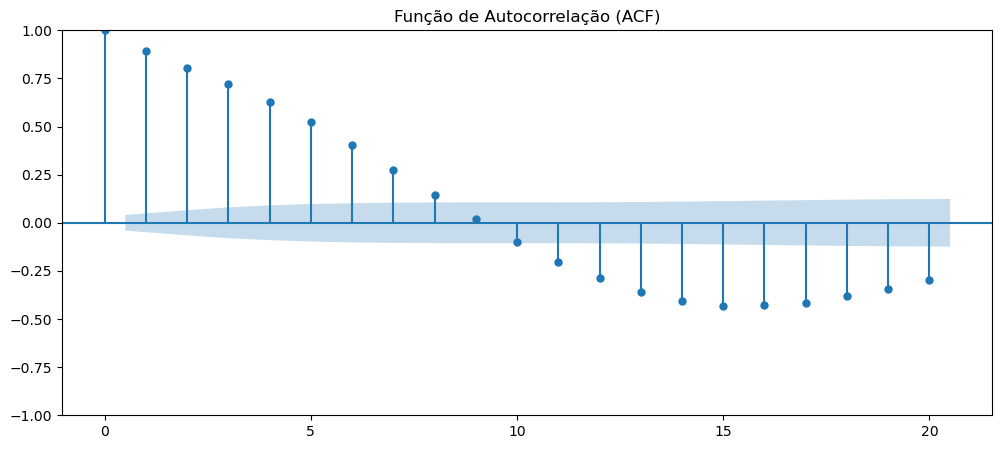

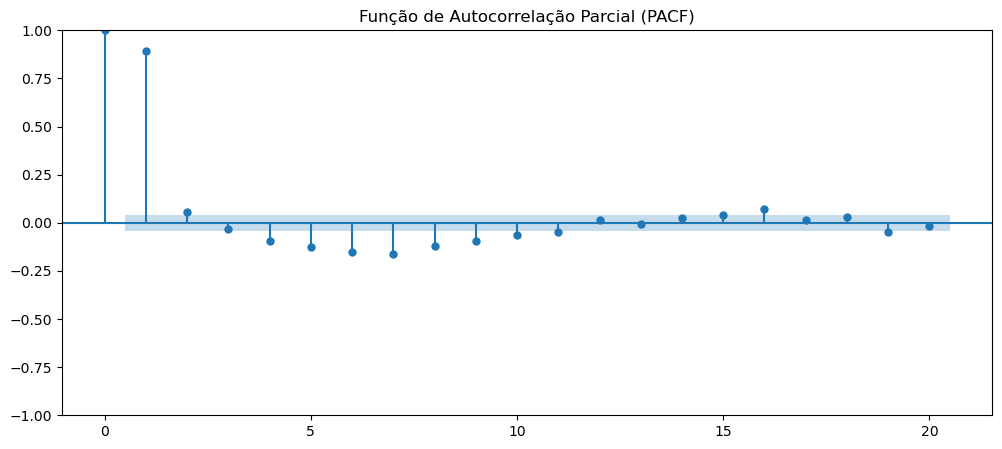

In [40]:
data = df['temperature']

# Verificando a série transformada
print(data)

#ACF E PACF ANTES DA PADRONIZAÇÃO DOS DADOS

# Plotar a função de autocorrelação (ACF)
plt.figure(figsize=(12, 5))
plot_acf(data, lags=20, ax=plt.gca())
plt.title('Função de Autocorrelação (ACF)')
plt.show()

# Plotar a função de autocorrelação parcial (PACF)
plt.figure(figsize=(12, 5))
plot_pacf(data, lags=20, ax=plt.gca())
plt.title('Função de Autocorrelação Parcial (PACF)')
plt.show()

In [46]:
# Ajustar o modelo ARIMA com os melhores parâmetros
model = ARIMA(df['temperature'], order=(4, 0, 0))
model_fit = model.fit()

# Resumo do modelo
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            temperature   No. Observations:                 2319
Model:                 ARIMA(4, 0, 0)   Log Likelihood               -3839.026
Date:                Tue, 11 Mar 2025   AIC                           7690.052
Time:                        16:48:07   BIC                           7724.545
Sample:                             0   HQIC                          7702.622
                               - 2319                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.1310      0.233    103.614      0.000      23.675      24.587
ar.L1          0.8402      0.018     45.647      0.000       0.804       0.876
ar.L2          0.0885      0.024      3.690      0.0

C:\Users\caioc.NUTEC2\AppData\Local\Temp\ipykernel_25796\478516444.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  plt.plot(pd.date_range(df.index[-1], periods=forecast_steps, freq='H'), forecast_reverted, label='Previsão', color='red')


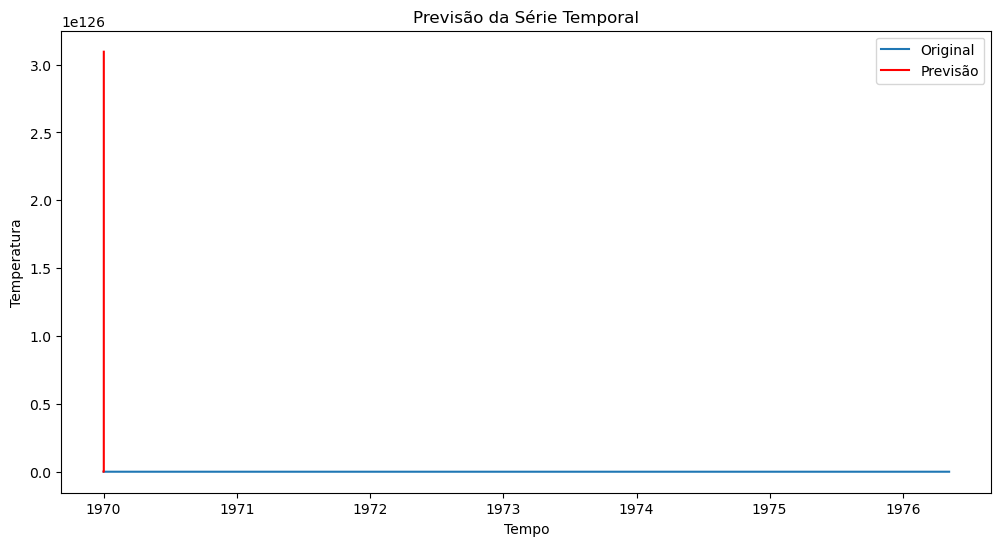

In [ ]:
# Fazer previsões
forecast_steps = 10  # Número de passos à frente para prever
forecast = model_fit.forecast(steps=forecast_steps)

# Reverter a diferenciação e a transformação Box-Cox
forecast_reverted = np.exp(forecast.cumsum() + df['temperature'].iloc[-1])

# Plotar as previsões
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['temperature'], label='Original')
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps, freq='H'), forecast_reverted, label='Previsão', color='red')
plt.title('Previsão da Série Temporal')
plt.xlabel('Tempo')
plt.ylabel('Temperatura')
plt.legend()
plt.show()
a